# 1. Importing Libraries

In [39]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

# 2. Data observation and cleaning

In [3]:
#read data directly from a github repository

file_set='/Dry_Bean_Dataset.csv'

dataframe=pd.read_csv(file_set)

In [4]:
print(dataframe.shape)

(13611, 17)


In [5]:
print(dataframe.columns[0:5])

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation'],
      dtype='object')


In [6]:
dataframe.columns[-1]

'Class'

In [7]:
#check for missing values
datanul=dataframe.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [8]:
print(dataframe['Class'].value_counts())

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


<AxesSubplot:>

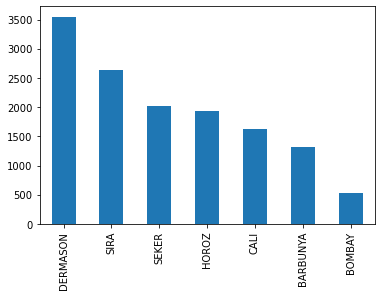

In [9]:
#plot a bar chat to display the class distribution

dataframe['Class'].value_counts().plot.bar()

<AxesSubplot:ylabel='Class'>

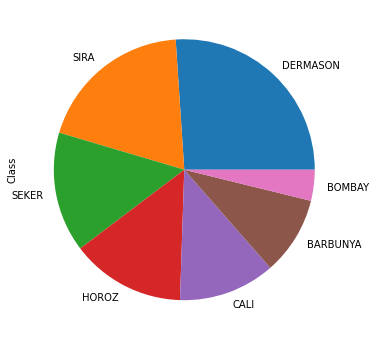

In [10]:
#plot a pie chat to display the class distribution

dataframe['Class'].value_counts().plot(kind='pie',figsize=(11,6))

# 3. Data preprocessing

In [11]:
#we will now seperate the feature values from the class. we do this because scikit-learn requires that features and class are separated before parsing them to the classifiers.

X=dataframe.iloc[:,0:-1]
y=dataframe.iloc[:,-1]

In [12]:
X.shape

(13611, 16)

In [17]:
y.shape

(13611,)

# 4. Encode labels

Note::The labels/class for this data are categorical and we therefore have to convert them to numeric forms. This is referred to as encoding. Machine learning models usually require input data to be in numeric forms, hence we encoding the labels.

In [14]:
#let's encode target labels (y), (here we have class column) with values between 0 and n_classes-1.
#encoding will be done using the LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [15]:
labels

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [16]:
classes

array([0, 1, 2, 3, 4, 5, 6])

# 5. Train and validate data (Machine learning)¶

## 5.1 Data Splitting

We will now split the data into training and test subsets. The training data is initially parsed to the machine learning model. this is to enable the model to identify discriminatory patterns which can be used to make future predictions. The testing data is used to evaluate the model after the training phase.

In [21]:
#split data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [22]:
dataframe.iloc[:,0:10].describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677


## 5.2 Data Normalization

Data normalization is done so that the values are in the same range. This will improve model performance and avoid bias

In [23]:
# scale data between 0 and 1

min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

In [24]:
type(X_train)

pandas.core.frame.DataFrame

In [25]:
X_train.iloc[0,3]

158.0336191

In [26]:
X_train_norm[0,3]

0.10518938328262462

## 5.3 Feature Selection:

Note: The objective of feature selection is to select relevant features for classification. Feature selection is usually used as a pre-processing step before doing the actual learning.

In this tutorial, mutual information algorithm is used to compute the relevance of each feature. The top n (eg. 300) features are selected for the machine learning analysis.

Feature Selection using Mutual Information

In [28]:
MI=mutual_info_classif(X_train_norm,y_train)

In [29]:
MI.shape

(16,)

In [30]:
MI[0:5]

array([1.03627829, 1.05723314, 0.99122408, 0.93449231, 0.81419295])

In [31]:
features=X_train.columns

In [32]:
features.shape

(16,)

In [33]:
features[0:5]

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation'],
      dtype='object')

In [34]:
#select top n features. lets say 300.
#you can modify the value and see how the performance of the model changes

n_features=300
selected_scores_indices=np.argsort(MI)[::-1][0:n_features]

In [35]:
X_train_selected=X_train_norm[:,selected_scores_indices]
X_test_selected=X_test_norm[:,selected_scores_indices]

In [36]:
X_train_selected.shape

(10888, 16)

In [38]:
X_test_selected.shape

(2723, 16)

## 5.4 Classification (Model Training)

::
The random forest classifier is used in this tutorial. Random forest works with multiclass and high dimensional data. Classification will involve training and testing of the model

Model Training:::

Training allows the machine learning model to learn from the data and use the identified patterns to predict the outcomes of data it has never seen before. In the training phase, the model is given the training subset. In this tutorial, the Random Forest Classifier is used.

In [40]:
#Random Forest Classifier
#because we are dealing with multiclass data, the one versus rest strategy is used.
#learn to predict each class against the other.

RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_selected,y_train)
y_pred =RF.predict(X_test_selected)
pred_prob = RF.predict_proba(X_test_selected)

## 5.5 Model Evaluation/Prediction: 

Model Evaluation
After training the model, it is important to know how the model performs on an independent data(i.e. the test data). The following metrics are used to evaluate the model

-accuracy
-precision
-recall
-f1 score
-confusion matrix
-ROC Curve

In [52]:
#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.8819
precision:0.8906
recall:0.8685
f1score:0.8693


classification report


              precision    recall  f1-score   support

    BARBUNYA       0.62      0.98      0.76       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.96      0.60      0.74       317
    DERMASON       0.93      0.82      0.87       671
       HOROZ       0.97      0.96      0.96       408
       SEKER       0.96      0.93      0.94       413
        SIRA       0.80      0.90      0.84       536

    accuracy                           0.87      2723
   macro avg       0.89      0.88      0.87      2723
weighted avg       0.89      0.87      0.87      2723



In [53]:
#generate confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=labels,columns=labels)

In [54]:
cm_df

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
BARBUNYA,255,0,4,0,0,1,1
BOMBAY,0,117,0,0,0,0,0
CALI,125,0,189,0,3,0,0
DERMASON,0,0,0,551,1,9,110
HOROZ,9,0,2,5,390,0,2
SEKER,8,0,0,12,0,383,10
SIRA,15,0,2,24,10,5,480


Text(33.0, 0.5, 'True Labels')

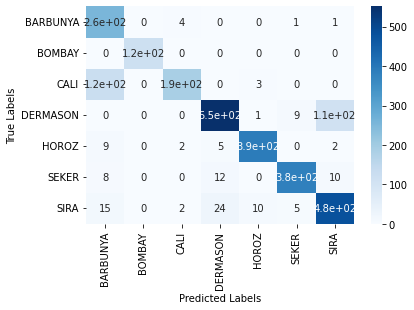

In [55]:
#visualize the confusion matrix using seaborn

sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

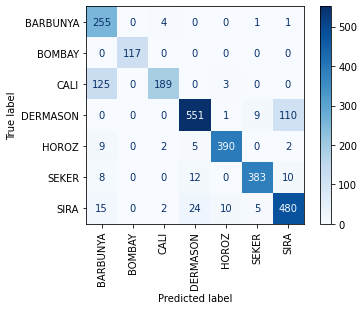

In [56]:
#visualize the confusion matrix directly
disp=plot_confusion_matrix(RF,X_test_selected,y_test,xticks_rotation='vertical',
                     cmap='Blues',display_labels=labels)

In [57]:
pred_prob.shape

(2723, 7)

In [58]:
y_pred.shape

(2723,)

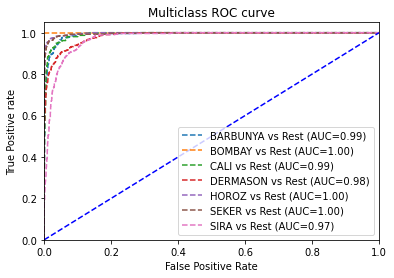

In [59]:
#roc curves will be generated for each class
#we will therefore have to binarize the y_test labels
#this is done because the probabilities(pred_prob) are calculated for each each class
#we therefore need to put the y_test label in the same format as the pred_prob
y_test_binarized=label_binarize(y_test,classes=classes)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(labels[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()    